Problem Statement : The objective of this project is to develop an accurate and reliable forecasting model to predict the sales of a super store. The sales data includes information on various products and time periods. The challenge is to create a robust forecasting model that can accurately estimate future sales for the super store, enabling effective inventory management, resource allocation, and strategic decision-making.

Sales Forecasting Objective : To accurately predict future sales figures.

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
import matplotlib.dates as mdates

In [2]:
#The data we will use is the superstore sales data, and it can be download here : https://community.tableau.com/docs/DOC-1236
data_df = pd.read_excel('Superstore.xls')
data_df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
data_df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [4]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

Wec have column Category which can divided the data into several subsets according to the product categories. Let's see how many categories of products we have in the data.

In [5]:
data_df = data_df[['Order Date', 'Category','Sales']]
data_df

,Order Date,Category,Sales
0,2016-11-08,Furniture,261.9600
1,2016-11-08,Furniture,731.9400
2,2016-06-12,Office Supplies,14.6200
3,2015-10-11,Furniture,957.5775
4,2015-10-11,Office Supplies,22.3680
...,...,...,...
9989,2014-01-21,Furniture,25.2480
9990,2017-02-26,Furniture,91.9600
9991,2017-02-26,Technology,258.5760
9992,2017-02-26,Office Supplies,29.6000


In [6]:
data_df['Category'].value_counts()

Category
Office Supplies    6026
Furniture          2121
Technology         1847
Name: count, dtype: int64

Now we can analyse different categories of products accordingly. let's take the Office Supplies data as an example. We will start our time series analysis on this category of products.

In [7]:
# Extract the data of Office Supplies
furniture_df = data_df.loc[data_df['Category'] == 'Furniture']

In [8]:
furniture_df = furniture_df[['Order Date','Sales']]

In [9]:
furniture_df  = furniture_df.sort_values('Order Date')
furniture_df = furniture_df.groupby('Order Date')['Sales'].sum().reset_index()

In [10]:
furniture_df.head()

,Order Date,Sales
0,2014-01-06,2573.820
1,2014-01-07,76.728
2,2014-01-10,51.940
3,2014-01-11,9.940
4,2014-01-13,879.939


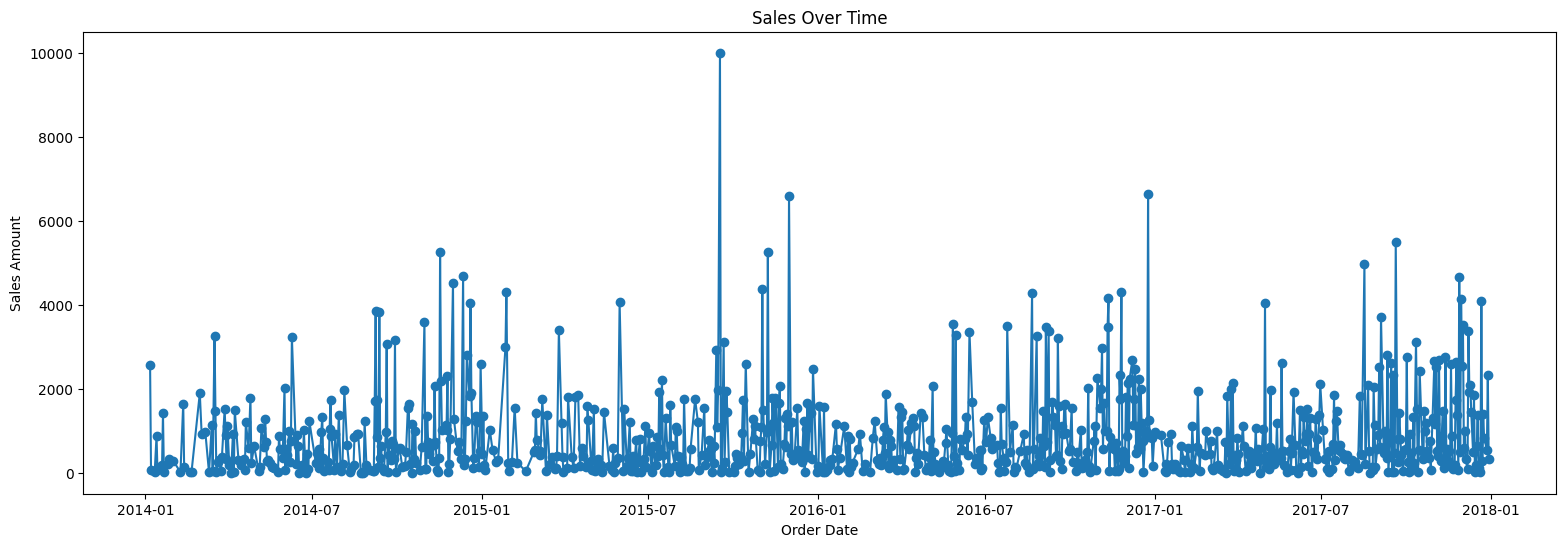

In [11]:
plt.figure(figsize=(19, 6)) 
plt.plot(furniture_df['Order Date'], furniture_df['Sales'], marker='o', linestyle='-')
plt.title('Sales Over Time')
plt.xlabel('Order Date')
plt.ylabel('Sales Amount')
plt.show()

In [12]:
furniture_df.set_index('Order Date', inplace=True)
furniture_df 

,Sales
Order Date,
2014-01-06,2573.8200
2014-01-07,76.7280
2014-01-10,51.9400
2014-01-11,9.9400
2014-01-13,879.9390
...,...
2017-12-24,1393.4940
2017-12-25,832.4540
2017-12-28,551.2568


Hypothesis Generation:

> The sales of office supplies have shown a consistent upward trend over the months and years, indicating increasing demand for these products.

> There is a monthly seasonality pattern in office supplies sales, with higher sales during certain months of the year, such as back-to-school seasons or during holiday periods.

In [13]:
#Checking the Time series
furniture_df.index

DatetimeIndex(['2014-01-06', '2014-01-07', '2014-01-10', '2014-01-11',
               '2014-01-13', '2014-01-14', '2014-01-16', '2014-01-19',
               '2014-01-20', '2014-01-21',
               ...
               '2017-12-18', '2017-12-19', '2017-12-21', '2017-12-22',
               '2017-12-23', '2017-12-24', '2017-12-25', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=889, freq=None)

It appears that the datetime index in our dataset is not continuous and includes specific dates rather than a continuous sequence of dates. In order to analyze the data in terms of monthly trends and seasonality, it is common to resample the data by aggregating it at the monthly level. This means that we would calculate the average daily sales value for each month and use the start of each month as the timestamp.

By resampling the data in this way, we can overcome the issue of having non-continuous dates and analyze the sales data in a monthly format, which makes it easier to identify trends and seasonality patterns.

In [14]:
#Time Resampling
furniture_df = furniture_df['Sales'].resample('MS').mean().to_frame()

In [15]:
furniture_df 

,Sales
Order Date,
2014-01-01,480.194231
2014-02-01,367.931600
2014-03-01,857.291529
2014-04-01,567.488357
2014-05-01,432.049188
2014-06-01,695.059242
2014-07-01,601.169500
2014-08-01,457.521656
2014-09-01,992.353367


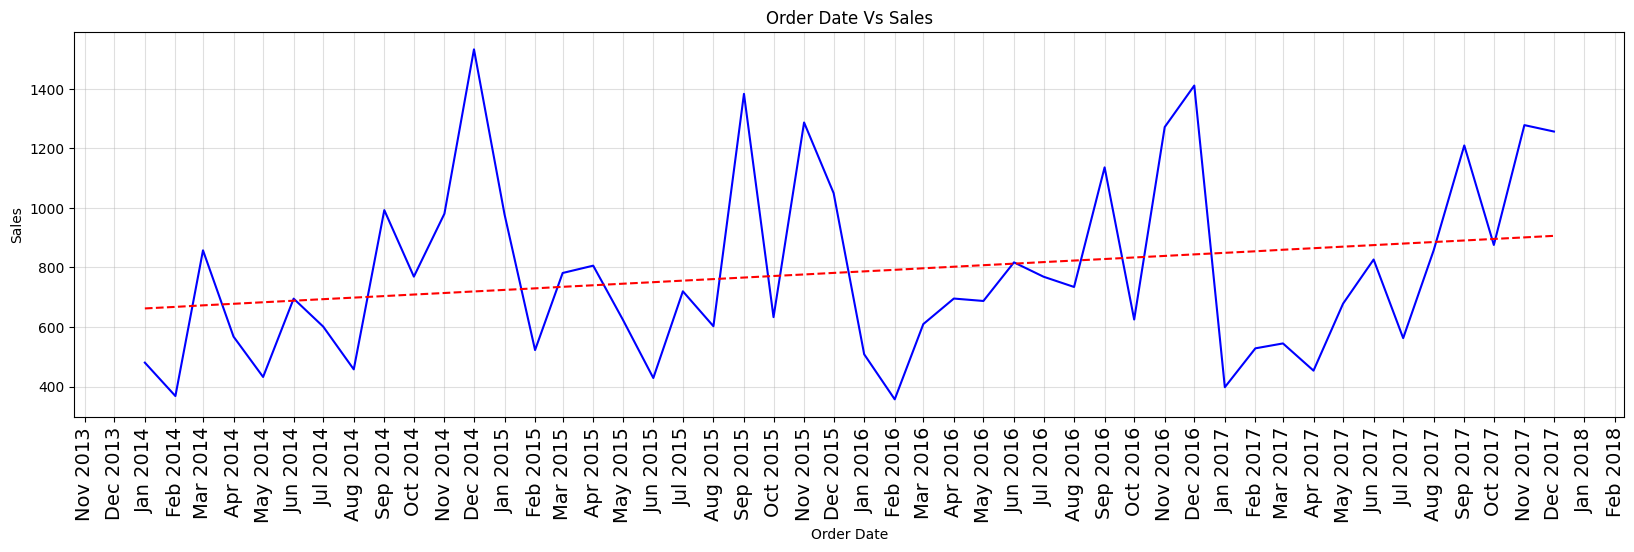

In [16]:
def generate_plot(data_df,x= None, title=None, xlabel="Order Date", ylabel="Sales"):
    plt.figure(figsize=(20, 5))
    plt.plot(data_df.index, x, color='b')
    # Calculate the trend line
    trend = np.polyfit(range(len(data_df)), x, 1)
    trend_line = np.poly1d(trend)
    plt.plot(data_df.index, trend_line(range(len(data_df))), color='r', linestyle='--', label='Trend Line')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.xticks(rotation=90,fontsize=14)
    plt.xlabel(xlabel) # Increase x-axis label size
    plt.ylabel(ylabel)  # Increase y-axis label size
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # Month and Year format
    plt.grid(True, alpha=0.4)  # Add grid with light opacity
    plt.gca().title # Increase title size
    plt.show()

generate_plot(furniture_df ,x= furniture_df["Sales"], title="Order Date Vs Sales", xlabel="Order Date", ylabel="Sales")


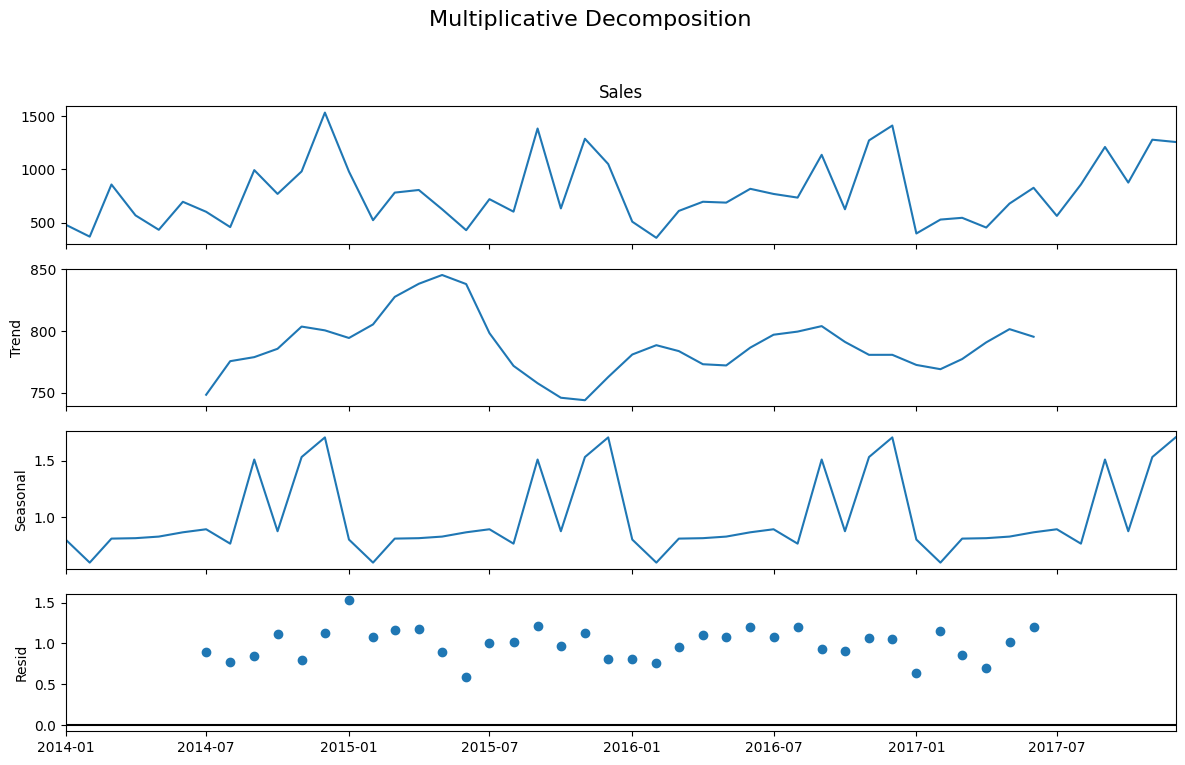

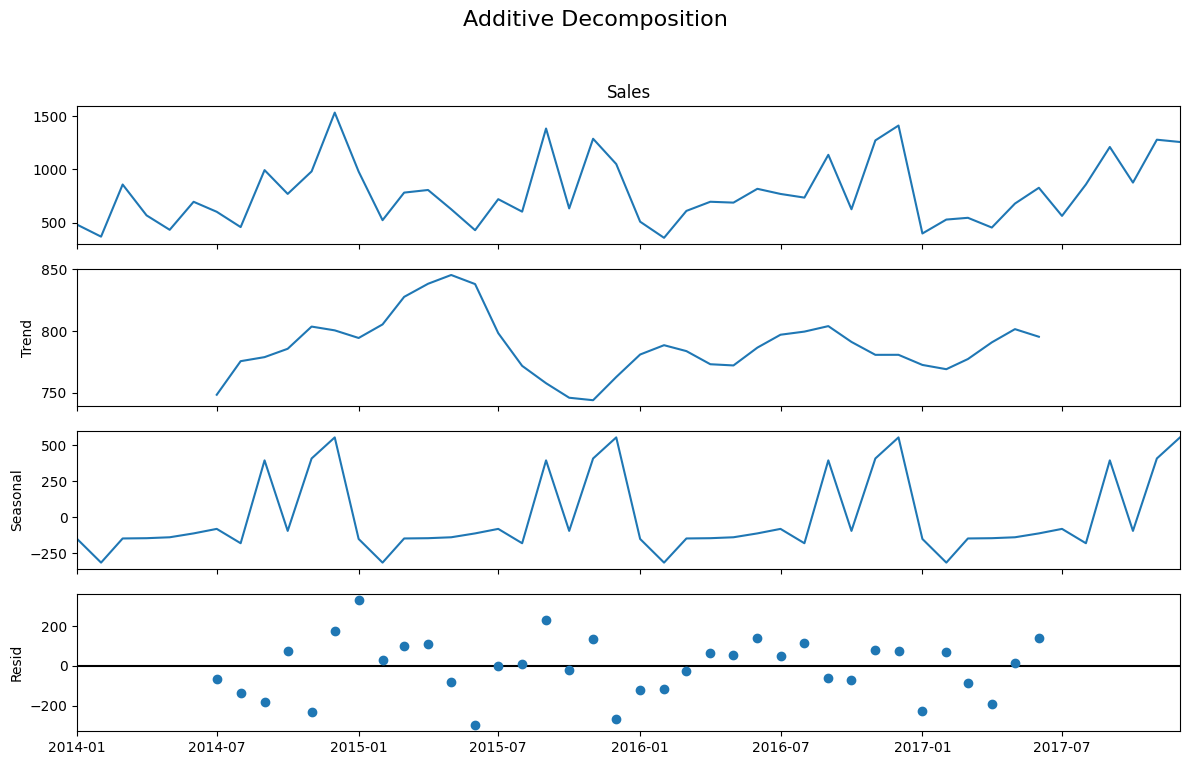

In [17]:
# Decomposition and Components of the Times series
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform Additive Decomposition
decomposition_add = seasonal_decompose(furniture_df["Sales"], model='additive')

# Perform Multiplicative Decomposition
decomposition_mul = seasonal_decompose(furniture_df["Sales"], model='multiplicative')

# Plot
plt.rcParams.update({'figure.figsize': (12,8)})

decomposition_mul.plot().suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

decomposition_add.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

Observations from Time Series Decomposition:

Trend: Stable trend until June 2015, followed by a sudden level shift and decreasing trend.
Seasonality: Seasonal pattern observed
Residuals/Errors: few errors. all are random.

These observations provide further insights into the decomposition of the furniture sales time series. The stable trend until a sudden level shift, recurring seasonality, and random residuals suggest the presence of underlying patterns and dynamics within the data

#Testing for Stationarity

The ADF test evaluates the null hypothesis that a unit root is present in the data. If the p-value obtained from the test is below a certain significance level (e.g., 0.05), we reject the null hypothesis and conclude that the data is stationary. On the other hand, if the p-value is above the significance level, we fail to reject the null hypothesis, indicating non-stationarity.

In [18]:
from statsmodels.tsa.stattools import adfuller
# Perform Augmented Dickey-Fuller test
result = adfuller(furniture_df['Sales'])

# Extract test statistics and p-value
adf_statistic = result[0]
p_value = result[1]

# Compare p-value with significance level
if p_value < 0.05:
    print("The time series is stationary (reject null hypothesis)")
else:
    print("The time series is non-stationary (fail to reject null hypothesis)")

# Print ADF test statistics and p-value
print("ADF Statistic:", adf_statistic)
print("p-value:", p_value)

The time series is stationary (reject null hypothesis)
ADF Statistic: -5.191070187339271
p-value: 9.168756655665654e-06


Although the p-value < 0.05, indicating that the time series is stationary, we will still attempt to further enhance its stationarity.

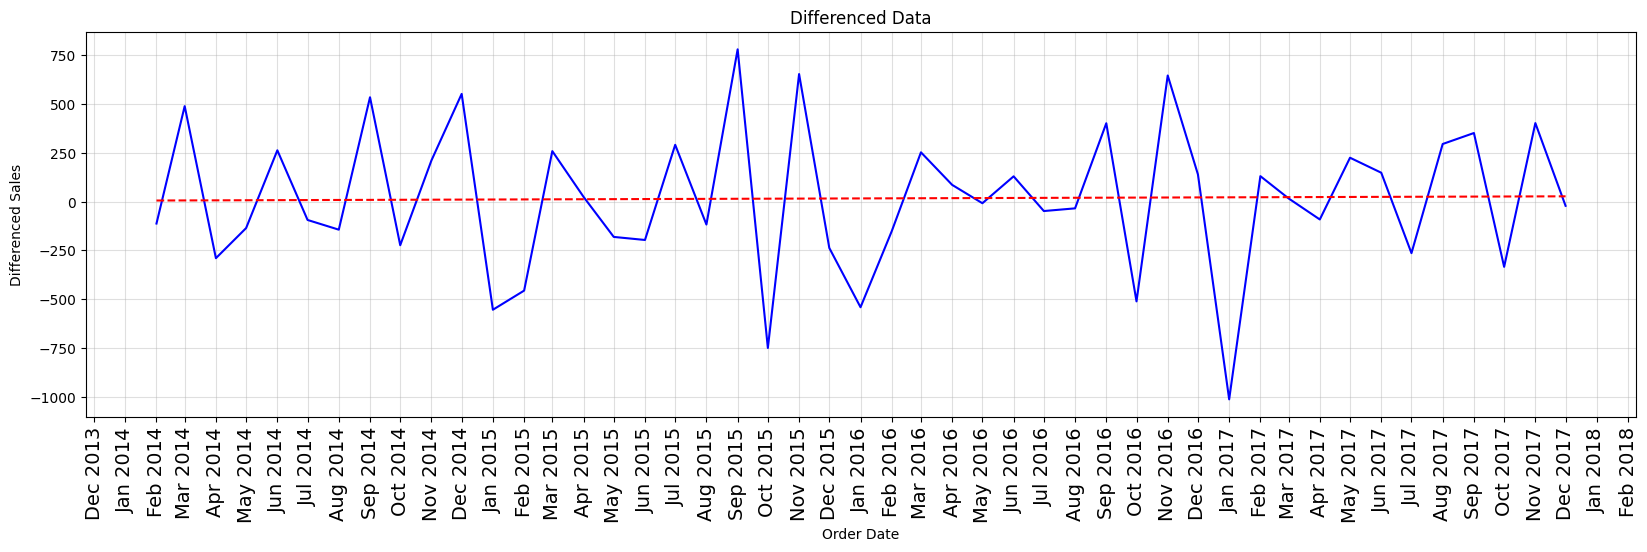

In [19]:
# Apply differencing to make the data stationary
furniture_df['Differenced_Data'] = furniture_df['Sales'].diff()
# Drop missing values
furniture_df.dropna(inplace=True)
# Plot the differenced data
generate_plot(furniture_df, x=furniture_df['Differenced_Data'], title='Differenced Data', ylabel='Differenced Sales')

Autocorrelation and Partial Autocorrelation Analysis

In [20]:
len(furniture_df['Sales'])

47

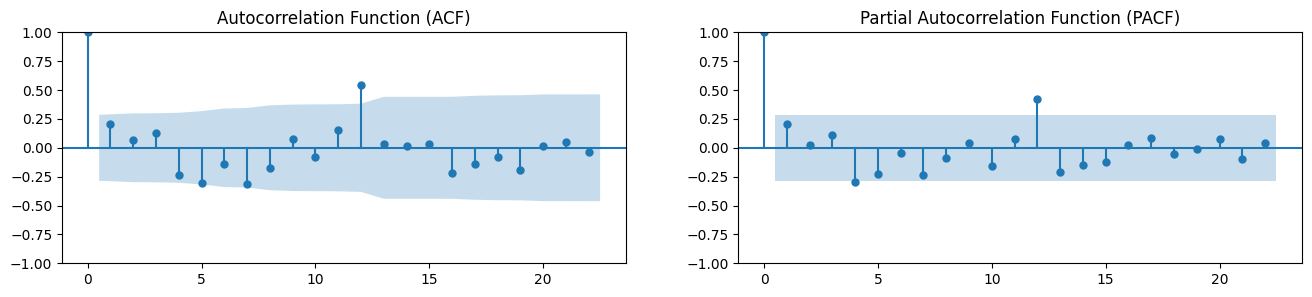

In [21]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Create subplots for ACF and PACF
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16, 3))

# Compute ACF and PACF
plot_acf(furniture_df['Sales'], lags=22, ax=ax1)
plot_pacf(furniture_df['Sales'], lags=22, ax=ax2)

# Set plot  title
ax1.set_title('Autocorrelation Function (ACF)')
ax2.set_title('Partial Autocorrelation Function (PACF)')

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.4)

# Show the plots
plt.show()

Therefore, observing a single lollipop touching the confidence interval in either the ACF or PACF plot may suggest the potential value of 1 for either the lag of an AR model (AR-0) or the lag of an MA model (MA-1).

ACF gives MA order
PACF gives AR order

Preparing Time Series Dataset before Applying Models
Set the Time Index : we have already set the time index
Check for White Noise : We can see the trend and seasonality. There is no white noise
Check for Stationarity : we already checked the stationarity and also did differencing to make the series stationary

In [22]:
#Split the Dataset
furniture_df  = furniture_df.drop('Differenced_Data', axis=1)
train_df = furniture_df.loc[:'2017-01-01']
test_df = furniture_df.loc['2017-01-01':]
print(train_df.shape)
print(test_df.shape)

(36, 1)
(12, 1)


Time series Forecasting Models

AIC: 520.0107160876858
Mean Squared Error (MSE): 94843.18806958797
Mean Absolute Error (MAE): 263.28369701243315
Root Mean Squared Error (RMSE): 307.96621254544783


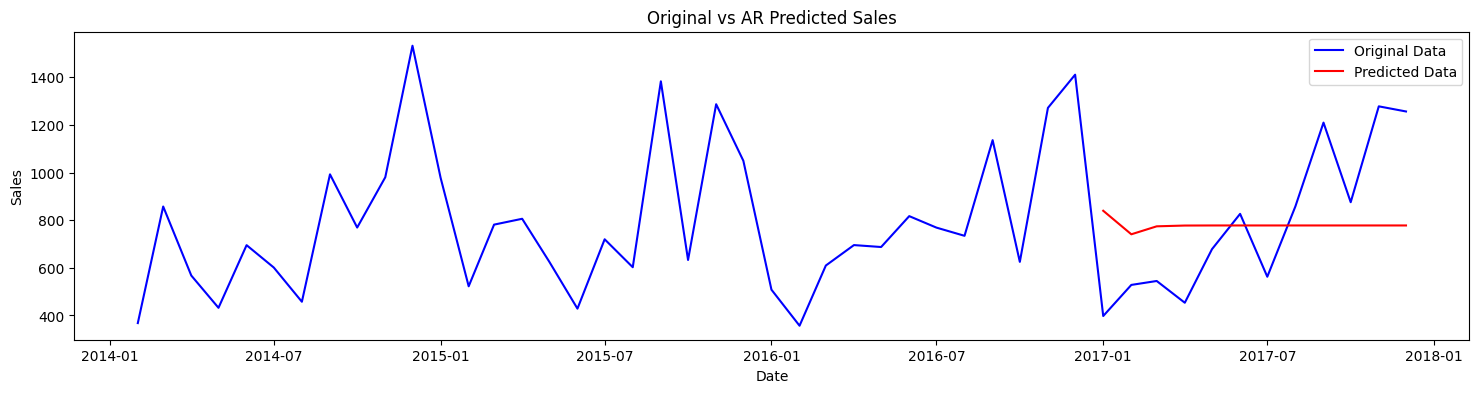

In [23]:
#1. Auto Regression(AR) Model
from statsmodels.tsa.arima.model import ARIMA
lag_order    =   1
ar_model     =  ARIMA(train_df,order=(lag_order, 0, 0))
ar_model_fit =  ar_model.fit()
predictions  =  ar_model_fit.predict(start=test_df.index[0],end=test_df.index[-1])

mse = np.mean((predictions - test_df['Sales'])**2)  # Mean Squared Error
mae = np.mean(np.abs(predictions - test_df['Sales']))  # Mean Absolute Error
rmse = np.sqrt(mse)  # Root Mean Squared Error

AR = {
    'MSE':mse,'MAE':mae,'RMSE':rmse
}

print(f"AIC: {ar_model_fit.aic}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

plt.figure(figsize=(18,4))
plt.plot(furniture_df.index,furniture_df['Sales'], label='Original Data', color='blue')
plt.plot(test_df.index,predictions,label='Predicted Data', color='red')
plt.title('Original vs AR Predicted Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

AIC: 520.0107160876858
Mean Squared Error (MSE): 94466.15425833898
Mean Absolute Error (MAE): 262.72441152698485
Root Mean Squared Error (RMSE): 307.3534679458473


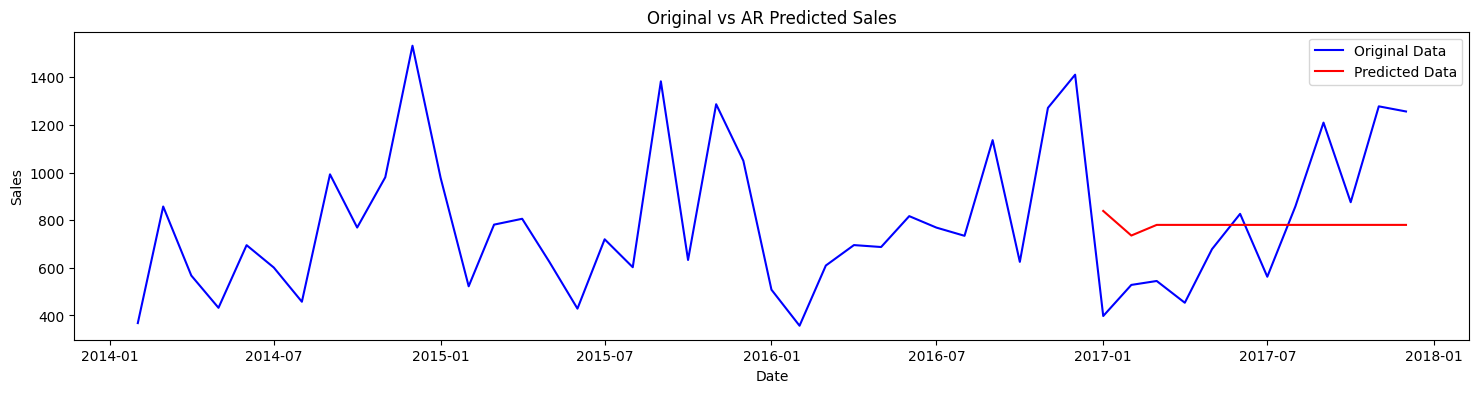

In [24]:
#2. Moving Average(MA) Model
from statsmodels.tsa.arima.model import ARIMA
lag_order    =   1
ma_model     =  ARIMA(train_df,order=(0, 0, lag_order))
ma_model_fit =  ma_model.fit()
predictions  =  ma_model_fit.predict(start=test_df.index[0],end=test_df.index[-1])

mse = np.mean((predictions - test_df['Sales'])**2)  # Mean Squared Error
mae = np.mean(np.abs(predictions - test_df['Sales']))  # Mean Absolute Error
rmse = np.sqrt(mse)  # Root Mean Squared Error

MA = {
    'MSE':mse,'MAE':mae,'RMSE':rmse
}

print(f"AIC: {ar_model_fit.aic}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

plt.figure(figsize=(18,4))
plt.plot(furniture_df.index,furniture_df['Sales'], label='Original Data', color='blue')
plt.plot(test_df.index,predictions,label='Predicted Data', color='red')
plt.title('Original vs AR Predicted Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

AIC: 520.0107160876858
Mean Squared Error (MSE): 91997.1968313507
Mean Absolute Error (MAE): 260.87094920851473
Root Mean Squared Error (RMSE): 303.3103968401853


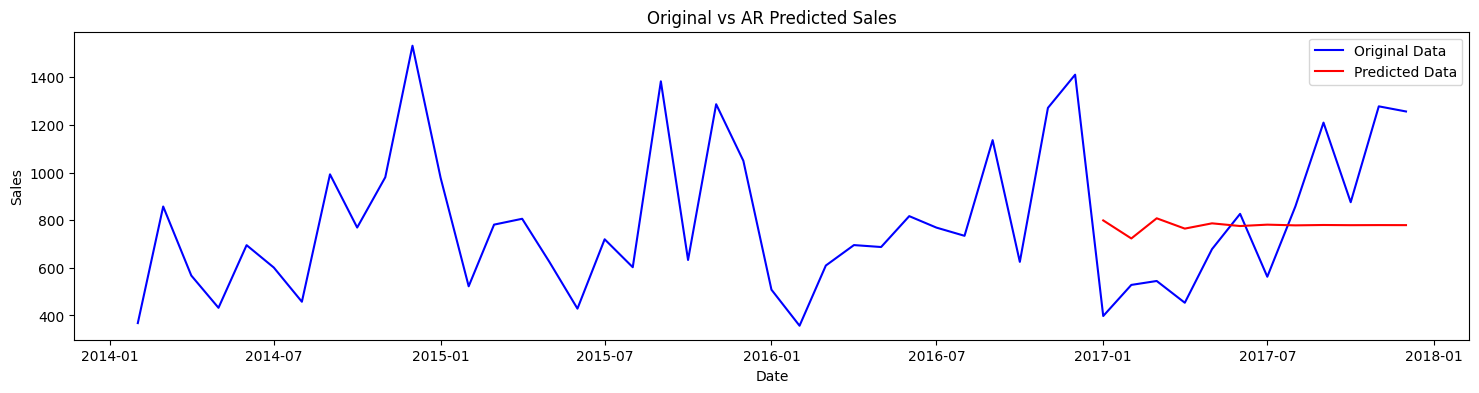

In [25]:
#3. Auto Regression Moving Average(ARMA) Model
from statsmodels.tsa.arima.model import ARIMA
lag_order    =   1
ARMA_model     =  ARIMA(train_df,order=(lag_order, 0, lag_order))
ARMA_model_fit =  ARMA_model.fit()
predictions  =  ARMA_model_fit.predict(start=test_df.index[0],end=test_df.index[-1])

mse = np.mean((predictions - test_df['Sales'])**2)  # Mean Squared Error
mae = np.mean(np.abs(predictions - test_df['Sales']))  # Mean Absolute Error
rmse = np.sqrt(mse)  # Root Mean Squared Error

ARMA = {
    'MSE':mse,'MAE':mae,'RMSE':rmse
}

print(f"AIC: {ar_model_fit.aic}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

plt.figure(figsize=(18,4))
plt.plot(furniture_df.index,furniture_df['Sales'], label='Original Data', color='blue')
plt.plot(test_df.index,predictions,label='Predicted Data', color='red')
plt.title('Original vs AR Predicted Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

AIC: 520.0107160876858
Mean Squared Error (MSE): 97257.86417772628
Mean Absolute Error (MAE): 264.9539667903222
Root Mean Squared Error (RMSE): 311.86193127364277


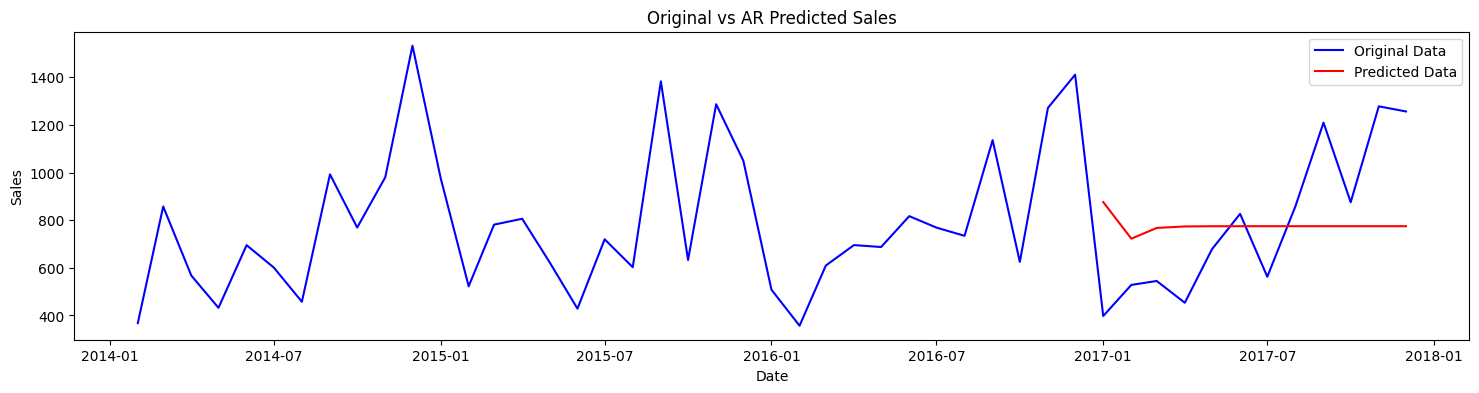

In [26]:
#4. Auto Regression Moving Average(ARIMA) Model
from statsmodels.tsa.arima.model import ARIMA
p = d = q = 1
ARIMA_model     =  ARIMA(train_df,order=(p,d,q))
ARIMA_model_fit =  ARIMA_model.fit()
predictions  =  ARIMA_model_fit.predict(start=test_df.index[0],end=test_df.index[-1])

mse = np.mean((predictions - test_df['Sales'])**2)  # Mean Squared Error
mae = np.mean(np.abs(predictions - test_df['Sales']))  # Mean Absolute Error
rmse = np.sqrt(mse)  # Root Mean Squared Error

ARIMA_ = {
    'MSE':mse,'MAE':mae,'RMSE':rmse
}

print(f"AIC: {ar_model_fit.aic}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

plt.figure(figsize=(18,4))
plt.plot(furniture_df.index,furniture_df['Sales'], label='Original Data', color='blue')
plt.plot(test_df.index,predictions,label='Predicted Data', color='red')
plt.title('Original vs AR Predicted Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [27]:
#Finding best p,d,q values to make better fit

import itertools
import warnings
warnings.filterwarnings("ignore")

# Define the range of p, d, q values to try
p_values = range(0, 3)  # Autoregressive order
d_values = range(0, 2)  # Order of differencing
q_values = range(0, 3)  # Moving average order

# Create a list of all possible combinations of p, d, q values
pdq_values = list(itertools.product(p_values, d_values, q_values))
print(pdq_values)

# Initialize variables to store the best model and AIC value
best_model = None
best_aic = float('inf')

for pdq in pdq_values:
    try:
        # Fit the ARIMA model on the training data
        arima_model = ARIMA(train_df['Sales'], order=pdq)
        arima_model_fit = arima_model.fit()
        
        # Get the AIC value for the current model
        aic = arima_model_fit.aic
        
        # Check if the current model has a lower AIC value than the best model so far
        if aic < best_aic:
            best_aic = aic
            best_model = arima_model_fit
            best_pdq = pdq
        
        print(f"ARIMA{pdq} - AIC: {aic}")
    except:
        continue

# Print the best model and its AIC value
print(f"Best Model: ARIMA{best_pdq} - AIC: {best_aic}")

[(0, 0, 0), (0, 0, 1), (0, 0, 2), (0, 1, 0), (0, 1, 1), (0, 1, 2), (1, 0, 0), (1, 0, 1), (1, 0, 2), (1, 1, 0), (1, 1, 1), (1, 1, 2), (2, 0, 0), (2, 0, 1), (2, 0, 2), (2, 1, 0), (2, 1, 1), (2, 1, 2)]
ARIMA(0, 0, 0) - AIC: 518.330224620073
ARIMA(0, 0, 1) - AIC: 520.0097119277624
ARIMA(0, 0, 2) - AIC: 521.9821249439972
ARIMA(0, 1, 0) - AIC: 522.1156892690892
ARIMA(0, 1, 1) - AIC: 508.9707789524307
ARIMA(0, 1, 2) - AIC: 510.37524748071064
ARIMA(1, 0, 0) - AIC: 520.0107160876858
ARIMA(1, 0, 1) - AIC: 521.7686882666292
ARIMA(1, 0, 2) - AIC: 520.8729697619503
ARIMA(1, 1, 0) - AIC: 517.2456252648465
ARIMA(1, 1, 1) - AIC: 510.3630229273105
ARIMA(1, 1, 2) - AIC: 512.2925866641134
ARIMA(2, 0, 0) - AIC: 522.01246414568
ARIMA(2, 0, 1) - AIC: 523.7714853156397
ARIMA(2, 0, 2) - AIC: 514.3412723445879
ARIMA(2, 1, 0) - AIC: 513.279479534669
ARIMA(2, 1, 1) - AIC: 515.2678392528946
ARIMA(2, 1, 2) - AIC: 514.3103479286974
Best Model: ARIMA(0, 1, 1) - AIC: 508.9707789524307


In [28]:
#5. Seasonal Auto Regression Moving Average(SARIMA) model
p = range(0, 2)  # Autoregressive order
d = range(0, 2)  # Order of differencing
q = range(0, 2)  # Moving average order

pdq = list(itertools.product(p,d,q))
seasonal_pdq = [(x[0],x[1],x[2], 12) for x in pdq]
print(pdq)
print(seasonal_pdq)

[(0, 0, 0), (0, 0, 1), (0, 1, 0), (0, 1, 1), (1, 0, 0), (1, 0, 1), (1, 1, 0), (1, 1, 1)]
[(0, 0, 0, 12), (0, 0, 1, 12), (0, 1, 0, 12), (0, 1, 1, 12), (1, 0, 0, 12), (1, 0, 1, 12), (1, 1, 0, 12), (1, 1, 1, 12)]


In [29]:
import statsmodels.api as sm
warnings.filterwarnings("ignore")

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(train_df, order=param, seasonal_order=param_seasonal,enforce_stationarity=False, enforce_invertibility=False)
            with warnings.catch_warnings():
                warnings.filterwarnings("ignore")
                results = mod.fit(disp=False)
            
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            
            if results.aic < best_aic:
                best_aic = results.aic
                best_model = results
                
        except:
            continue

print('Best Model: ARIMA{}x{}12 - AIC:{}'.format(best_model.specification.order,best_model.specification.seasonal_order,best_aic))


ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:573.3052783058862
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:363.4566255396939
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:320.19623123335606
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:148.3472072319687
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:335.1762123396807
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:321.4649749673055
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:160.87278789629937
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:150.16734248014268
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:534.8574571191281
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:338.42297988100466
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:309.1630952644371
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:136.7488761925255
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:337.4353322219622
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:313.64607730781165
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:162.28940264374057
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:137.80363442376768
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:506.8138426423633
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:324.9235764784413
ARI

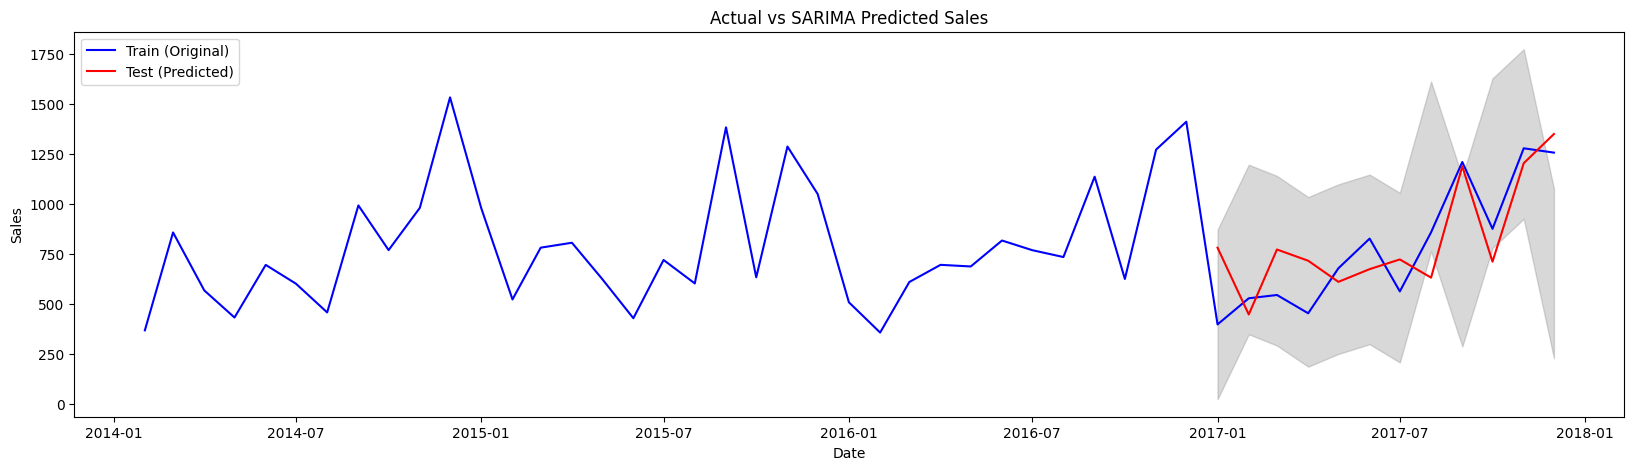

Mean Squared Error (MSE): 35053.86358496053
Mean Absolute Error (MAE): 159.5607114970084
Root Mean Squared Error (RMSE): 187.22677048157544


In [30]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
sarima_model = SARIMAX(train_df['Sales'], order=(0, 1, 1), seasonal_order=(0, 1, 1, 12))
sarima_model_fit = sarima_model.fit(disp=False)
predictions = sarima_model_fit.predict(start=test_df.index[0], end=test_df.index[-1])

# Plot the actual values and predictions
plt.figure(figsize=(20,5))
plt.plot(furniture_df.index, furniture_df['Sales'], label='Train (Original)', color='blue')
plt.plot(test_df.index, predictions, label='Test (Predicted)', color='red')

# Add confidence intervals
pred_confidence = sarima_model_fit.get_forecast(len(test_df)).conf_int()
plt.fill_between(test_df.index, pred_confidence.iloc[:, 0], pred_confidence.iloc[:, 1], color='gray', alpha=0.3)

plt.title('Actual vs SARIMA Predicted Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()

plt.show()



mse = np.mean((predictions - test_df['Sales'])**2)  # Mean Squared Error
mae = np.mean(np.abs(predictions - test_df['Sales']))  # Mean Absolute Error
rmse = np.sqrt(mse)  # Root Mean Squared Error

SARIMA_ = {
    'MSE':mse,'MAE':mae,'RMSE':rmse
}

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

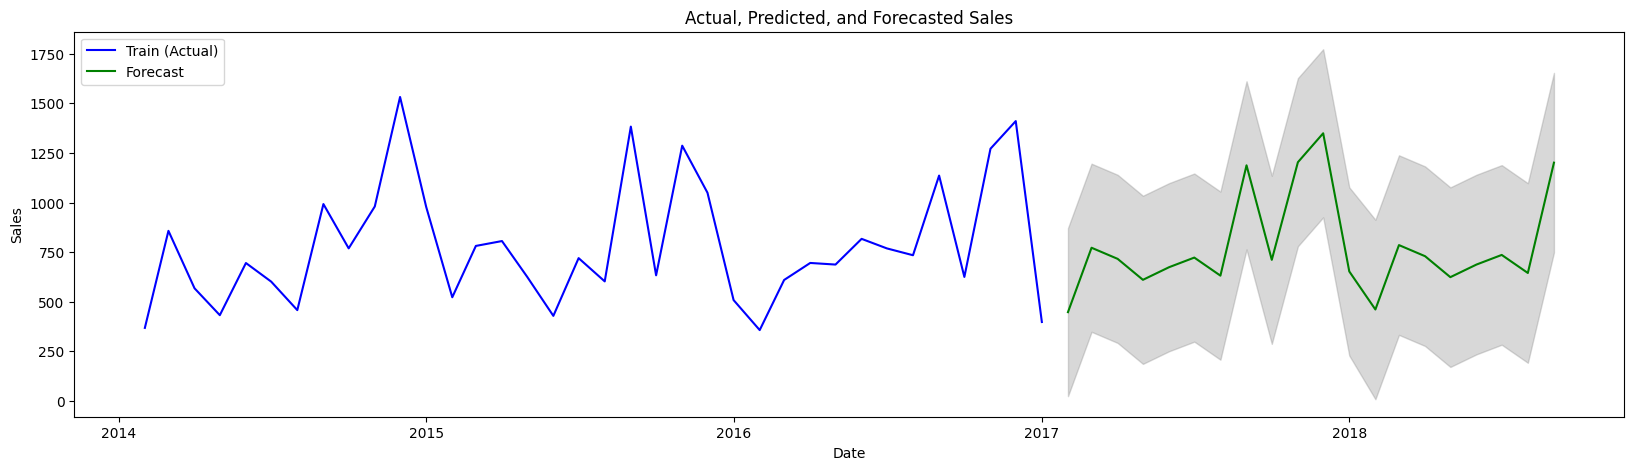

In [31]:
# Forecast for the next 50 steps
forecast = sarima_model_fit.get_forecast(steps=20)
# Get the predicted values
predicted_values = forecast.predicted_mean
# Get the confidence intervals
pred_confidence = forecast.conf_int()
# Plot the actual values, predictions, and forecasted values with confidence intervals
plt.figure(figsize=(20, 5))
plt.plot(train_df.index, train_df['Sales'], label='Train (Actual)', color='blue')
plt.plot(predicted_values.index, predicted_values, label='Forecast', color='green')
# Add confidence intervals for the forecasted values
plt.fill_between(pred_confidence.index, pred_confidence.iloc[:, 0], pred_confidence.iloc[:, 1], color='gray', alpha=0.3)
plt.title('Actual, Predicted, and Forecasted Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

Applying Exponential smoothing models
>> Simple Exponential Smoothing : Simple exponential smoothing assigns exponentially decreasing weights to past observations to forecast future values.

Mean Squared Error (MSE): 112057.29068712001
Mean Absolute Error (MAE): 283.3885371774671
Root Mean Squared Error (RMSE): 334.7495940059077


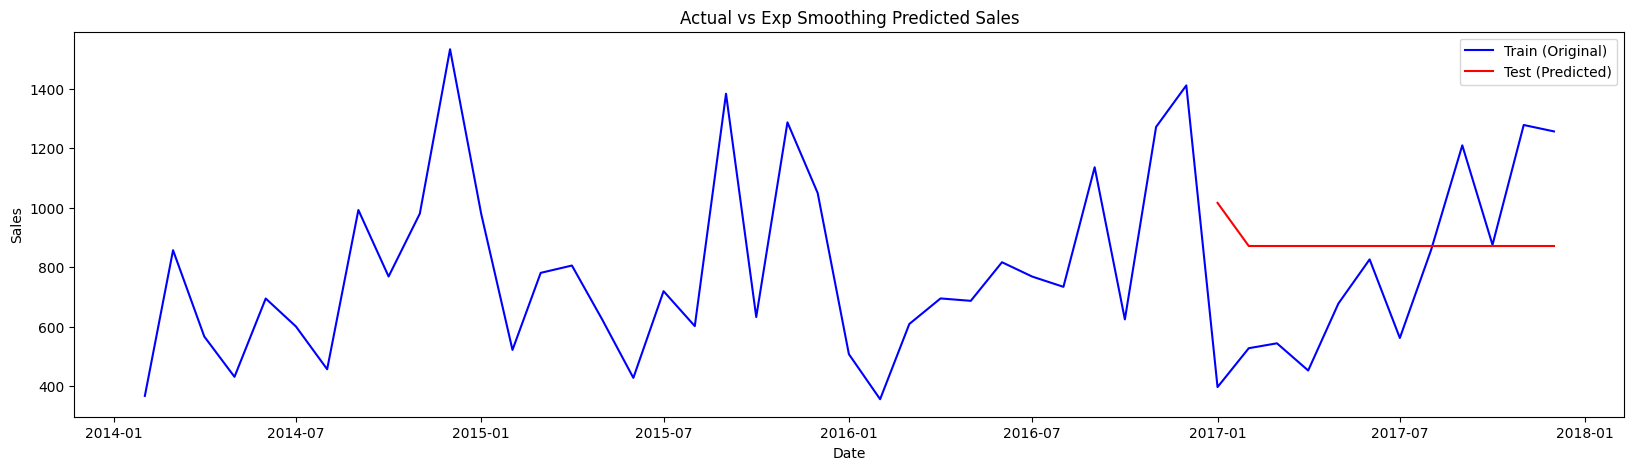

In [32]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
exp_smoothing_model = ExponentialSmoothing(train_df['Sales'])
exp_smoothing_model_fit = exp_smoothing_model.fit()
predictions = exp_smoothing_model_fit.predict(start=test_df.index[0], end=test_df.index[-1])
mse = np.mean((predictions - test_df['Sales'])**2)  # Mean Squared Error
mae = np.mean(np.abs(predictions - test_df['Sales']))  # Mean Absolute Error
rmse = np.sqrt(mse)  # Root Mean Squared Error

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Simple_Smoothing = {
    'MSE':mse,'MAE':mae,'RMSE':rmse
}

plt.figure(figsize=(20,5))
plt.plot(furniture_df.index, furniture_df['Sales'], label='Train (Original)', color='blue')
plt.plot(test_df.index, predictions, label='Test (Predicted)', color='red')

plt.title('Actual vs Exp Smoothing Predicted Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()

plt.show()


>> Holt’s Linear Trend method // Double Exponential Smoothing : 
Holt's trend model extends simple exponential smoothing to capture both trend and level in the time series.

Mean Squared Error (MSE): 412712.8916103048
Mean Absolute Error (MAE): 515.7274138889751
Root Mean Squared Error (RMSE): 642.4273434485061


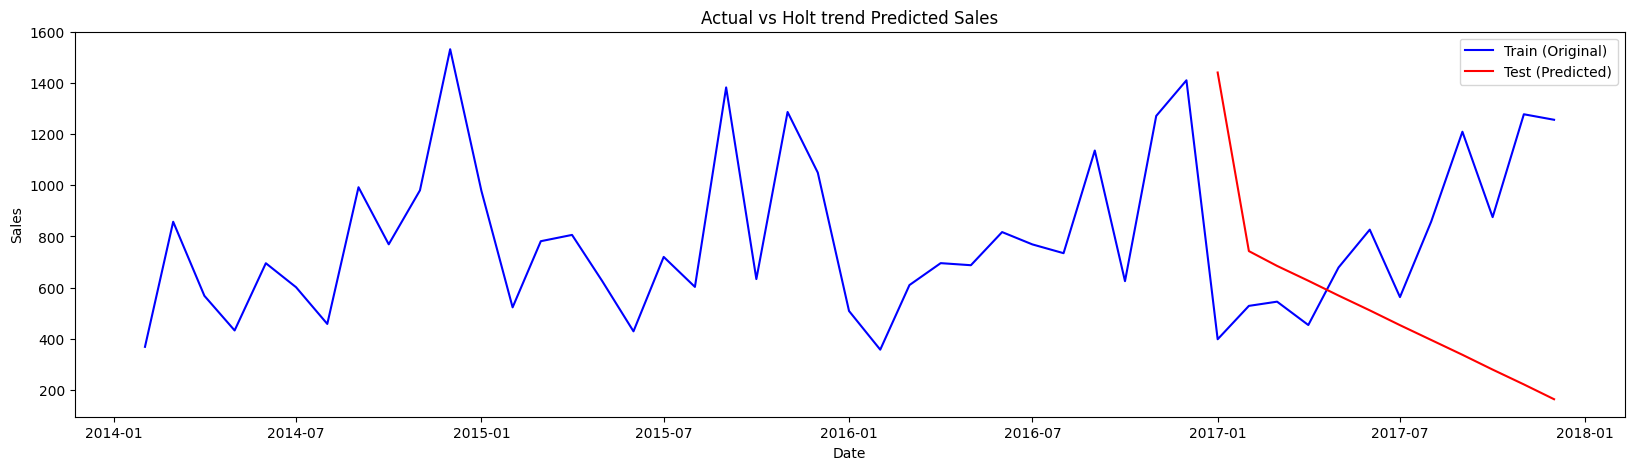

In [33]:
from statsmodels.tsa.holtwinters import Holt
holt_model = Holt(train_df['Sales'])
holt_model_fit = holt_model.fit()
predictions = holt_model_fit.predict(start=test_df.index[0], end=test_df.index[-1])
mse = np.mean((predictions - test_df['Sales'])**2)  # Mean Squared Error
mae = np.mean(np.abs(predictions - test_df['Sales']))  # Mean Absolute Error
rmse = np.sqrt(mse)  # Root Mean Squared Error
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Double_Smoothing = {
    'MSE':mse,'MAE':mae,'RMSE':rmse
}

plt.figure(figsize=(20,5))
plt.plot(furniture_df.index, furniture_df['Sales'], label='Train (Original)', color='blue')
plt.plot(test_df.index, predictions, label='Test (Predicted)', color='red')
plt.title('Actual vs Holt trend Predicted Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

>> Holt-Winters Method // Tripal Exponential Smoothing:
Holt-Winters' seasonal model extends Holt's trend model to include seasonality.

Mean Squared Error (MSE): 39115.26179592612
Mean Absolute Error (MAE): 163.55943322836464
Root Mean Squared Error (RMSE): 197.77578667755594


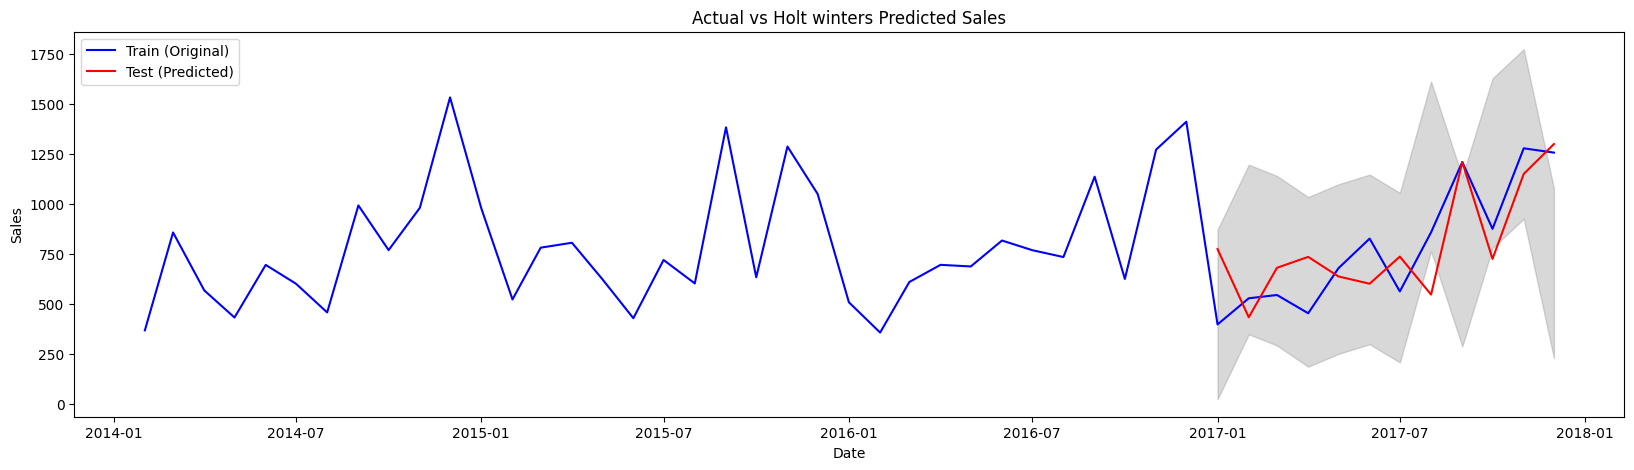

In [34]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
holtwinters_model = ExponentialSmoothing(train_df['Sales'], trend='add', seasonal='add', seasonal_periods=12)
holtwinters_model_fit = holtwinters_model.fit()
predictions = holtwinters_model_fit.predict(start=test_df.index[0], end=test_df.index[-1])
mse = np.mean((predictions - test_df['Sales'])**2)  # Mean Squared Error
mae = np.mean(np.abs(predictions - test_df['Sales']))  # Mean Absolute Error
rmse = np.sqrt(mse)  # Root Mean Squared Error

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Triple_Smoothing = {
    'MSE':mse,'MAE':mae,'RMSE':rmse
}

plt.figure(figsize=(20,5))
plt.plot(furniture_df.index, furniture_df['Sales'], label='Train (Original)', color='blue')
plt.plot(test_df.index, predictions, label='Test (Predicted)', color='red')

# Add confidence intervals
pred_confidence = sarima_model_fit.get_forecast(len(test_df)).conf_int()
plt.fill_between(test_df.index, pred_confidence.iloc[:, 0], pred_confidence.iloc[:, 1], color='gray', alpha=0.3)

plt.title('Actual vs Holt winters Predicted Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()

plt.show()

The Holts-winter method performs and captures the patterns and seasonalities similar to the SARIMA best model fit. Both of the plots look similar .However, when observed SARIMA model has least MAE so we forecasted the future values using SARIMA Model.

Now we will perform TSA using PROPHET librarey

In [35]:
#lets take data from above cell
furniture_df 

,Sales
Order Date,
2014-02-01,367.931600
2014-03-01,857.291529
2014-04-01,567.488357
2014-05-01,432.049188
2014-06-01,695.059242
2014-07-01,601.169500
2014-08-01,457.521656
2014-09-01,992.353367
2014-10-01,769.015437


In [36]:
furniture_df.reset_index(inplace=True)
print(furniture_df)

   Order Date        Sales
0  2014-02-01   367.931600
1  2014-03-01   857.291529
2  2014-04-01   567.488357
3  2014-05-01   432.049188
4  2014-06-01   695.059242
5  2014-07-01   601.169500
6  2014-08-01   457.521656
7  2014-09-01   992.353367
8  2014-10-01   769.015437
9  2014-11-01   980.221486
10 2014-12-01  1532.298325
11 2015-01-01   978.328467
12 2015-02-01   522.395667
13 2015-03-01   781.236437
14 2015-04-01   805.822962
15 2015-05-01   624.996700
16 2015-06-01   428.565500
17 2015-07-01   719.706316
18 2015-08-01   602.412012
19 2015-09-01  1382.790684
20 2015-10-01   632.980184
21 2015-11-01  1286.701354
22 2015-12-01  1049.355418
23 2016-01-01   508.182867
24 2016-02-01   356.868273
25 2016-03-01   609.575810
26 2016-04-01   695.373158
27 2016-05-01   687.265227
28 2016-06-01   816.910750
29 2016-07-01   768.736412
30 2016-08-01   734.307782
31 2016-09-01  1135.953371
32 2016-10-01   624.872474
33 2016-11-01  1271.345152
34 2016-12-01  1410.719808
35 2017-01-01   397.602133
3

In [37]:
furniture_df.to_csv('monthly_sales.csv', index=False)

In [38]:
#As per the Prophet, lets rename the columns as ds & y
furniture_df.rename(columns={'Order Date': 'ds', 'Sales': 'y'}, inplace=True)

In [39]:
# Make sure the 'ds' column is datetime
furniture_df['ds'] = pd.to_datetime(furniture_df['ds']) 

In [40]:
# Split the data into train and test sets
train = furniture_df.iloc[:-12]
test = furniture_df.iloc[-12:]

print(f"Train shape: {train.shape}")
print(f"Test shape: {test.shape}")

Train shape: (35, 2)
Test shape: (12, 2)


16:44:29 - cmdstanpy - INFO - Chain [1] start processing
16:44:29 - cmdstanpy - INFO - Chain [1] done processing


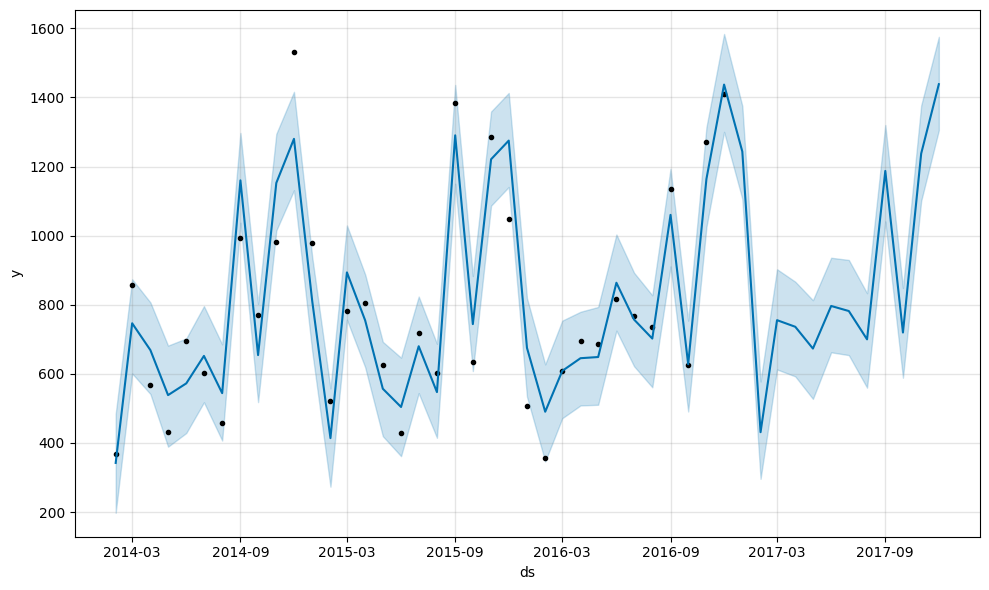

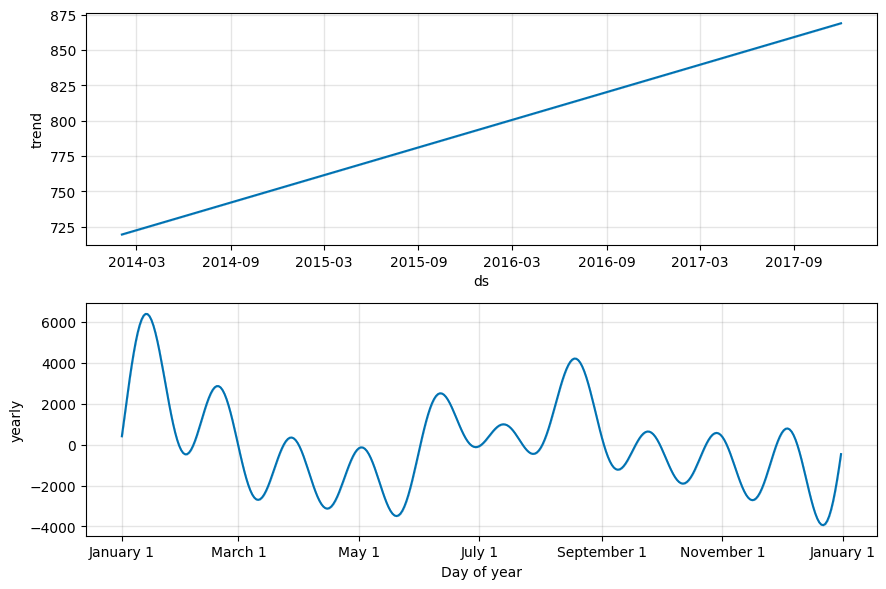

In [41]:
from prophet import Prophet

model = Prophet()
model.fit(train)

# Make a dataframe for future dates
future = model.make_future_dataframe(periods=12, freq='MS')

# Predict sales for future dates
forecast = model.predict(future)

# Visualize
model.plot(forecast)
plt.show()

model.plot_components(forecast)
plt.show()

In [42]:
print(forecast)

           ds       trend   yhat_lower   yhat_upper  trend_lower  trend_upper  \
0  2014-02-01  719.429387   198.019259   484.350384   719.429387   719.429387   
1  2014-03-01  722.421542   601.114947   873.804900   722.421542   722.421542   
2  2014-04-01  725.734285   541.761219   806.731182   725.734285   725.734285   
3  2014-05-01  728.940166   389.276799   681.794285   728.940166   728.940166   
4  2014-06-01  732.252910   428.883769   702.664817   732.252910   732.252910   
5  2014-07-01  735.458790   517.882913   796.079652   735.458790   735.458790   
6  2014-08-01  738.771534   407.019999   685.352327   738.771534   738.771534   
7  2014-09-01  742.084277  1037.429072  1297.241607   742.084277   742.084277   
8  2014-10-01  745.290158   518.266528   802.884367   745.290158   745.290158   
9  2014-11-01  748.602902  1014.890368  1294.734000   748.602902   748.602902   
10 2014-12-01  751.808783  1131.291777  1416.245208   751.808783   751.808783   
11 2015-01-01  755.121526   

In [43]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
# Extract the predicted values and assign to the test dataframe
test['prediction'] = forecast.iloc[-12:]['yhat'].values

# Calculate MAE, MSE, and RMSE
mae = mean_absolute_error(test['y'], test['prediction'])
mse = mean_squared_error(test['y'], test['prediction'])
rmse = mean_squared_error(test['y'], test['prediction'], squared=False)

# Print the results
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

FB_Prophet = {
    'MSE':mse,'MAE':mae,'RMSE':rmse
}

MAE: 187.39521185617718
MSE: 81883.79552684652
RMSE: 286.15344751871595


In [46]:
data = {
    'AR': {'MSE': AR.get('MSE'), 'MAE': AR.get('MAE'), 'RMSE': AR.get('RMSE')},
    'MA': {'MSE': MA.get('MSE'), 'MAE': MA.get('MAE'), 'RMSE': MA.get('RMSE')},
    'ARMA': {'MSE': ARMA.get('MSE'), 'MAE': ARMA.get('MAE'), 'RMSE': ARMA.get('RMSE')},
    'ARIMA_': {'MSE': ARIMA_.get('MSE'), 'MAE': ARIMA_.get('MAE'), 'RMSE': ARIMA_.get('RMSE')},
    'SARIMA_': {'MSE': SARIMA_.get('MSE'), 'MAE': SARIMA_.get('MAE'), 'RMSE': SARIMA_.get('RMSE')},
    'Simple_Smoothing': {'MSE': Simple_Smoothing.get('MSE'), 'MAE': Simple_Smoothing.get('MAE'), 'RMSE': Simple_Smoothing.get('RMSE')},
    'Double_Smoothing': {'MSE': Double_Smoothing.get('MSE'), 'MAE': Double_Smoothing.get('MAE'), 'RMSE': Double_Smoothing.get('RMSE')},
    'Triple_Smoothing': {'MSE': Triple_Smoothing.get('MSE'), 'MAE': Triple_Smoothing.get('MAE'), 'RMSE': Triple_Smoothing.get('RMSE')},
    'FB_Prophet': {'MSE': FB_Prophet.get('MSE'), 'MAE': FB_Prophet.get('MAE'), 'RMSE': FB_Prophet.get('RMSE')}
}

# Create the DataFrame directly with the index
df4 = pd.DataFrame.from_dict(data, orient='index')

# Display the DataFrame
print(df4)

                            MSE         MAE        RMSE
AR                 94843.188070  263.283697  307.966213
MA                 94466.154258  262.724412  307.353468
ARMA               91997.196831  260.870949  303.310397
ARIMA_             97257.864178  264.953967  311.861931
SARIMA_            35053.863585  159.560711  187.226770
Simple_Smoothing  112057.290687  283.388537  334.749594
Double_Smoothing  412712.891610  515.727414  642.427343
Triple_Smoothing   39115.261796  163.559433  197.775787
FB_Prophet         81883.795527  187.395212  286.153448


As mentioned above, we trained time series forecasting models such as AR, MA, ARMA, ARIMA, SARIMA, FB_Prophet to forecast future values based on historical patterns and trends. We also tried Smoothing on data and used evaluation metrics like Mean Absolute Error (MAE), Mean Squared Error (MSE), RMSE to assess the accuracy and performance of the forecasting models.

Conclusion : 
After Observing the above MAE, MSE and RMSE VALUE, We can say that SARIMA Model gives the best fit and the Holt-winters(Triple_Smoothing) perform better after the SARIMA Model.